# Chameleon [summary of usefull info]

### Image

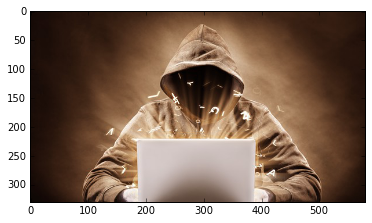

In [7]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('hacker.jpg')
plt.imshow(img)
plt.show()

In [8]:
img.shape

(330, 580, 3)

In [9]:
img[200,200] #if i get everything correct it is [R,G,B] format

array([213, 179, 143], dtype=uint8)

$\textbf{Question}$ - With which exactly numbers out of (R,G,B) does DCT work?

### (R,G,B) - different outcomes

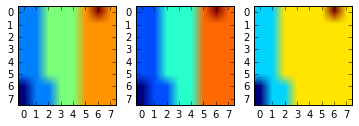

In [20]:
# Just to compare
part_of_the_img_0 = img[50:58, 50:58, 0] #using R
part_of_the_img_1 = img[50:58, 50:58, 1] #using G
part_of_the_img_2 = img[50:58, 50:58, 2] #using B
# Visualizing
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(part_of_the_img_0)
ax1 = fig.add_subplot(132)
ax1.imshow(part_of_the_img_1)
ax2 = fig.add_subplot(133)
ax2.imshow(part_of_the_img_2)

### DCT

There is no 2d implementation of DCT in python, but we can construct the matrix of transformation and use it to make DCT

In [32]:
# This part was copied from the web, so better to check.
N=8
W = np.zeros((N, N))
for i in range(N):
    W[0,i] = 1
for i in xrange(1,N):
    for k in xrange(N):
        W[i,k] = 2*np.cos((np.pi/N) * i * (k + 0.5) )
W=W.T

After we computed the transform matrix, we will write our own DTC function

In [33]:
def DCT(grid):   #forward DCT
    return np.dot(np.dot(W, grid), D.T)
def DCT_b(grid): #inverse DCT
    Di=np.linalg.inv(D)
    return np.dot(np.dot(Di, grid), Di.T)

Let's try our DTC on the 8*8 matrixes from above (I mean colored subplots)

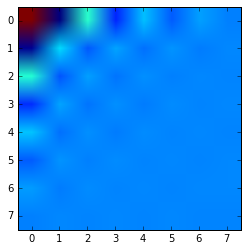

In [35]:
plt.imshow(DCT(part_of_the_img_0))

And now we will try to undo our DTC

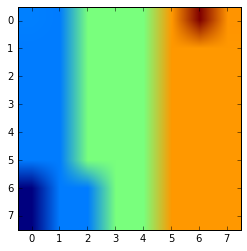

In [36]:
plt.imshow(DCT_b(DCT(part_of_the_img_0)))

As we can see everything works, though I really think you should check matrix thing